### Урок 3. Классификация. Логистическая регрессия.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#тот же пример про репетитора из прошлого ДЗ
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [7]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

В случае, когда $y$ принимает значения 0 и 1, log loss запишется как

$$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)} + (1 - y_{i})\text{ln} (1-\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)})).$$

$$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}(\sigma) + (1 - y_{i})\text{ln} (1-\sigma)).$$

In [8]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [9]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [10]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [11]:
z = np.linspace(-10, 10, 101)

In [12]:
probabilities = sigmoid(z)

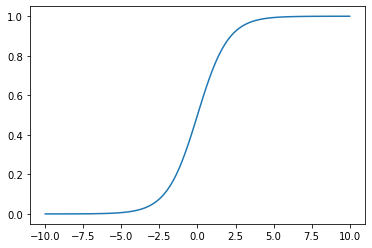

In [13]:
plt.plot(z, probabilities)
plt.show()

### Logistic Regression

In [14]:

def eval_model(X, y, iterations, alpha=1e-4):
    i_value=[]
    logloss_value=[]
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
        #для задания 2
        i_value.append(i)
        logloss_value.append(err)
    #return W
    return{'W':W,'i':i_value,'logloss':logloss_value} #переделаем под задание 2

In [15]:
eval_model_dict = eval_model(X_st, y, iterations=5000, alpha=1e-4)
W = eval_model_dict['W']
i_value=eval_model_dict['i']
logloss_value=eval_model_dict['logloss']
logloss_value[-1]

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.7651177745022372
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105478
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442176
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515638
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.5532737788236778


0.5532737788236778

In [16]:
#W

## Д/з

### 1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [17]:
#подойти итеративно: каждый из элементов в цикле проверять на != 0 и для таких слуаев оставляем исходную формулу
#

def calc_logloss2(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [18]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss2(y1, y_pred1)

0.10536051565782628

### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.7651177745022372
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105478
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442176
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515638
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.5532737788236778


0.5532737788236778

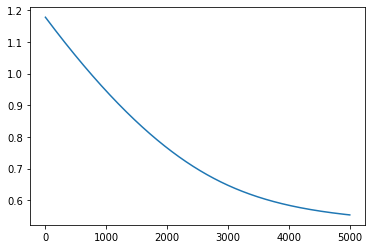

In [19]:
eval_model_dict = eval_model(X_st, y, iterations=5000, alpha=1e-4)
W = eval_model_dict['W']
i_value=eval_model_dict['i']
logloss_value=eval_model_dict['logloss']
plt.plot(i_value, logloss_value)
logloss_value[-1]

10000 [ 0.46074414 -0.27646983  0.64395606  1.46891921] 0.9450369970710211
20000 [ 0.42913804 -0.39750512  0.63899533  1.42106747] 0.7650009877005977
30000 [ 0.40240616 -0.49486157  0.63498214  1.38185735] 0.6468237479935138
40000 [ 0.38050409 -0.56494789  0.63387122  1.35260558] 0.5836558863032378
50000 [ 0.36249596 -0.61232237  0.63568313  1.33184021] 0.5532665943101582
60000 [ 0.34724984 -0.64426517  0.63950165  1.31710301] 0.5382675349002043
70000 [ 0.33392744 -0.66620476  0.64454905  1.30648487] 0.5302306261674848
80000 [ 0.32197836 -0.68153932  0.65033442  1.29873171] 0.5254850419591693
90000 [ 0.31103968 -0.69238062  0.65655912  1.29302531] 0.5223852406708362
100000 [ 0.30086451 -0.7000869   0.66303662  1.28881564] 0.5201517015500403


0.5201517015500403

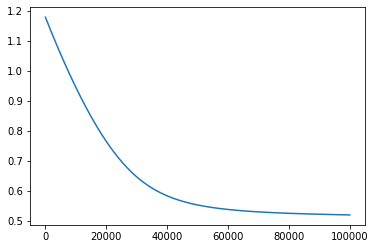

In [20]:
eval_model_dict = eval_model(X_st, y, iterations=100000, alpha=1e-5)
W = eval_model_dict['W']
i_value=eval_model_dict['i']
logloss_value=eval_model_dict['logloss']
plt.plot(i_value, logloss_value)
logloss_value[-1]

500 [ 0.30079678 -0.70031444  0.66308276  1.28874116] 0.5201633776043038
1000 [ 0.21868932 -0.7169891   0.72740228  1.28032009] 0.5084394737153239
1500 [ 0.1515603  -0.71596756  0.78093129  1.28995944] 0.5009445647172969
2000 [ 0.09281728 -0.71711216  0.82373888  1.30616901] 0.49538005761816273
2500 [ 0.04043214 -0.72055788  0.85796998  1.32691073] 0.4910116475819201
3000 [-0.00704628 -0.72563311  0.88543002  1.35091564] 0.48739519811315557
3500 [-0.05074596 -0.73180304  0.90753117  1.37720416] 0.48426417689684564
4000 [-0.09153705 -0.73867267  0.9253656   1.4050246 ] 0.4814587290836302
4500 [-0.13008517 -0.74595324  0.93977534  1.4338092 ] 0.47888212042508826
5000 [-0.16689678 -0.75343529  0.95140969  1.46313484] 0.4764747437107684


0.4764747437107684

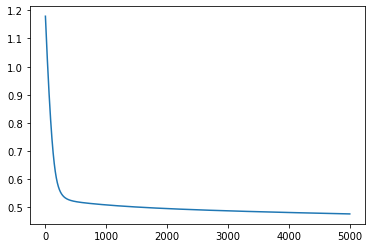

In [21]:
eval_model_dict = eval_model(X_st, y, iterations=5000, alpha=.002)
W = eval_model_dict['W']
i_value=eval_model_dict['i']
logloss_value=eval_model_dict['logloss']
plt.plot(i_value, logloss_value)
logloss_value[-1]

500 [ 0.25674223 -0.71540834  0.69622554  1.28004682] 0.5133144254309007
1000 [ 0.15154486 -0.71597381  0.78097099  1.28996636] 0.5009479856555286
1500 [ 0.06591459 -0.71859714  0.84184161  1.31606788] 0.4930814494305693
2000 [-0.00705912 -0.72563922  0.88546489  1.3509241 ] 0.4873968488476209
2500 [-0.07147005 -0.73517734  0.91695549  1.39097211] 0.48282938886901644
3000 [-0.13009405 -0.74596057  0.9398037   1.43382044] 0.4788835223722036
3500 [-0.18478263 -0.75721071  0.95637321  1.47791195] 0.4753234975820666
4000 [-0.2367599  -0.768453    0.96827046  1.52226142] 0.47203099537494586
4500 [-0.28683246 -0.77940588  0.97659787  1.56626339] 0.46894151137565493
5000 [-0.33553179 -0.78991005  0.9821229   1.60955963] 0.4660161100039277


0.4660161100039277

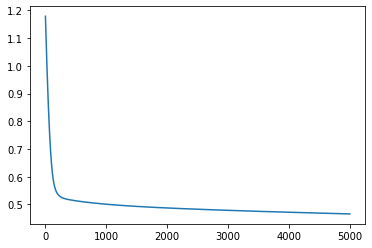

In [22]:
eval_model_dict = eval_model(X_st, y, iterations=5000, alpha=.003)
W = eval_model_dict['W']
i_value=eval_model_dict['i']
logloss_value=eval_model_dict['logloss']
plt.plot(i_value, logloss_value)
logloss_value[-1]

In [41]:
#остановимся на этом :)

### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [23]:
def calc_pred_proba(w, x):
    return sigmoid(np.dot(w,x))

W = eval_model(X_st, y, iterations=5000, alpha=0.002)['W']
p = calc_pred_proba(W, X_st)
p

500 [ 0.30079678 -0.70031444  0.66308276  1.28874116] 0.5201633776043038
1000 [ 0.21868932 -0.7169891   0.72740228  1.28032009] 0.5084394737153239
1500 [ 0.1515603  -0.71596756  0.78093129  1.28995944] 0.5009445647172969
2000 [ 0.09281728 -0.71711216  0.82373888  1.30616901] 0.49538005761816273
2500 [ 0.04043214 -0.72055788  0.85796998  1.32691073] 0.4910116475819201
3000 [-0.00704628 -0.72563311  0.88543002  1.35091564] 0.48739519811315557
3500 [-0.05074596 -0.73180304  0.90753117  1.37720416] 0.48426417689684564
4000 [-0.09153705 -0.73867267  0.9253656   1.4050246 ] 0.4814587290836302
4500 [-0.13008517 -0.74595324  0.93977534  1.4338092 ] 0.47888212042508826
5000 [-0.16689678 -0.75343529  0.95140969  1.46313484] 0.4764747437107684


array([0.40391271, 0.50080724, 0.69232955, 0.03891359, 0.80706613,
       0.72169258, 0.81539086, 0.21404615, 0.38053155, 0.78609648])

### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [24]:
def calc_pred(W, X):
    return np.round(calc_pred_proba(W, X), 0)

y_pred = calc_pred(W, X_st)
print('y_pred:',y_pred)
print('y:     ',y)

y_pred: [0. 1. 1. 0. 1. 1. 1. 0. 0. 1.]
y:      [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]


### 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

|  <empty>   | $$y = +1$$ | $$y = -1$$ |
--- | --- | ---
| __$$a(x) = +1$$__  |   TP    |   FP   |
| __$$a(x) = -1$$__ |   FN    |   TN   |

В матрице сверху отложены истинные ответы, слева - ответы алгоритма. Когда алгоритм относит объект к классу "+1", говорят, что он срабатывает_, а когда к "-1", - _пропускает. Если алгоритм сработал (дал положительный ответ) и объект действительно относится к классу "+1", говорят, что имеет место верное срабатывание/верный положительный ответ (True Positive, TP), а если объект не относится к классу "+1", это ложное срабатывание (False Positive, FP). Если алгоритм пропускает объект, а его истинный класс "+1", это ложный пропуск/ложный негативные ответ (False Negative, FN), а если истинный класс объекта "-1", имеет место истинный пропуск (True Negative, TN). При такой классификации уже есть два вида ошибок - ложные срабатывания и ложные пропуски. По главной диагонали в матрице ошибок располагаются верные ответы, по побочной - неверные.

In [33]:
# Псотроим матрицу ошибок
err_matrix = np.zeros((2, 2))
for i in range(len(y)):
    if y_pred[i] == 1 and y[i] != 0:
        err_matrix[0][0] += 1
    elif y_pred[i] == 1 and y[i] != 1:
        err_matrix[0][1] += 1
    elif y_pred[i] == 0 and y[i] != 1:
        err_matrix[1][1] += 1
    else:
        err_matrix[1][0] += 1
err_matrix

array([[4., 2.],
       [1., 3.]])

В классификации часто используются две метрики - _точность_ и _полнота_.

Точность (precision) представляет из себя долю истинных срабатываний от общего количества срабатываний. Она показывает, насколько можно доверять алгоритму классификации в случае срабатывания

$$precision(a, X) = \frac{TP}{TP+FP}.$$

Полнота (recall) считается как доля объектов, истинно относящихся к классу "+1", которые алгоритм отнес к этому классу

$$recall(a, X) = \frac{TP}{TP+FN},$$

здесь $TP+FN$ как раз будут вместе составлять весь список объектов класса "+1".

In [34]:
def precision(err_matrix):
    return err_matrix[0][0] / (err_matrix[0][0] + err_matrix[0][1])

def recall(err_matrix):
    return err_matrix[0][0] / (err_matrix[0][0] + err_matrix[1][0])



In [35]:
precision(err_matrix)

0.6666666666666666

In [36]:
recall(err_matrix)

0.8

 Есть различные варианты объединения их в одну метрику, одним из наиболее удобных из них является _F-мера_, которая представляет собой среднее гармоническое между точностью и полнотой

$$F = \frac{2 \cdot precision \cdot recall }{ presision + recall}.$$

В отличие от, например, среднего арифметического, если хотя бы один из аргументов близок к нулю, то и среднее гармоническое будет близко к нулю.

In [37]:
def f_measure(err_matrix):
    return (2 * precision(err_matrix) * recall(err_matrix)/(precision(err_matrix) + recall(err_matrix)))

In [38]:
f_measure(err_matrix)

0.7272727272727272

усовершенствованная версия F-меры $F_{\beta}$:

$$F_{\beta} = (1 + \beta^{2}) \frac{precision \cdot recall}{\beta^{2} \cdot precision + recall}.$$

Параметр $\beta$ здесь определяет вес точности в метрике. При $\beta = 1$ это среднее гармоническое, умноженное на 2 (чтобы в случае $precision = 1$ и $recall = 1$ $F_{1} = 1$). Его изменение требуется, когда необходимо отдать приоритет точности или полноте, как это было показано в примерах ранее. Чтобы важнее была полнота, $\beta$ должно быть меньше 1, чтобы важнее была точность - больше.

In [39]:
def f_measure_b(b, err_matrix):
    return (1 + b **2) * (precision(err_matrix) * recall(err_matrix)) / (b ** 2 * precision(err_matrix) + recall(err_matrix))

In [40]:
f_measure_b(1, err_matrix)

0.7272727272727272

__6. ВОПРОС:Могла ли модель переобучиться? Почему?__

__ОТВЕТ__:

Думаю нет. Но могла бы, в случае с коэффициентами весов при минимальном log loss. Из этих соображений я не стал уходить дальше, преследуя минимизацию log loss, поскольку заметил рост весов по модулю. Остановился на alpha = 0.002~0.003